#Q3

##creating database

###imports

In [22]:
from numpy.random import uniform
from numpy import array
import numpy as np

###create first data base with uniform dis

In [23]:
import numpy as np

samples = 100
lower_bound = -2**0.5
upper_bound = 2**0.5

X1 = np.empty((samples, 2))

count = 0
while count < samples:
    x1, x2 = np.random.uniform(lower_bound, upper_bound, 2)
    if 1 < x1**2 + x2**2 < 2:
        X1[count] = [x1, x2]
        count += 1
    
print(X1)

[[-1.10238561 -0.43085603]
 [ 1.09827419 -0.27121937]
 [ 0.08447048 -1.25145605]
 [-0.32859095  1.25207137]
 [-0.91146689 -0.65506381]
 [ 1.38829493 -0.10283463]
 [-1.3112781  -0.17546642]
 [-1.07773129  0.90886012]
 [-0.72360473  0.70199589]
 [-0.70588087  1.1275113 ]
 [-0.98218557 -0.2549954 ]
 [ 0.02981684 -1.12500306]
 [ 1.01158621  0.87860119]
 [-0.65694822  0.81703544]
 [-0.39475151  1.00389107]
 [ 0.32443903  0.94889481]
 [-1.17475555 -0.4749789 ]
 [-0.73068202 -0.76439019]
 [-0.83086648  0.96839528]
 [-0.73667642  0.87324301]
 [ 0.16904602 -1.24343219]
 [-0.56396772 -1.1078386 ]
 [ 0.79867557  0.63384989]
 [-1.14067166  0.21492632]
 [ 1.25401499  0.17684617]
 [ 0.93801878  0.56247651]
 [ 0.52829221 -1.11293338]
 [ 1.17952136 -0.71737983]
 [-1.16001095  0.31471358]
 [-0.55149844  0.94952219]
 [ 1.27910371  0.54875238]
 [-0.92408233  1.00171244]
 [ 0.94751019  0.98500522]
 [-0.78018546 -0.64342053]
 [ 0.68118898  0.82539916]
 [ 1.03385753  0.569133  ]
 [ 0.39024304  1.26578923]
 

###create second data base with uniform dis

In [24]:
import numpy as np

samples = 100

lower_bound = -5**0.5
upper_bound = 5**0.5

X2 = np.empty((samples, 2))

count = 0
while count < samples:
    x1, x2 = np.random.uniform(lower_bound, upper_bound, 2)
    if 4 < x1**2 + x2**2 < 5:
        X2[count] = [x1, x2]
        count += 1
    
print(X2)

[[-1.7976529  -1.11275623]
 [ 1.78347274 -1.02718119]
 [ 0.98283503  1.79212789]
 [-1.45288271  1.56862901]
 [-2.07819348 -0.15437784]
 [ 1.06609597  1.75440914]
 [-2.1725257   0.23628625]
 [ 0.36475086  2.12962642]
 [-0.72747057 -2.0907503 ]
 [ 2.03975474 -0.68302945]
 [ 1.63977109 -1.27035621]
 [ 0.40576021  2.00376208]
 [ 0.36445976  2.20137768]
 [-2.2193112  -0.22109372]
 [ 0.83101506  2.00073719]
 [ 1.73013207 -1.26568284]
 [ 1.83574725  0.91067997]
 [ 1.68093737  1.20957634]
 [-1.56567005 -1.24895271]
 [-1.13612757 -1.73027162]
 [ 0.65881039 -1.91445508]
 [ 0.89915905  1.87430527]
 [ 1.44661261 -1.69232836]
 [-1.81216457  0.9610363 ]
 [ 0.24364309 -2.03358034]
 [-0.38349275 -1.99907681]
 [-0.84056348 -2.06543647]
 [ 1.8274024  -1.09300932]
 [-0.27647458  2.04787393]
 [-1.47803287  1.44458194]
 [ 0.59287995 -2.11044023]
 [ 2.12142773  0.41373236]
 [-0.73093412  1.98128017]
 [-1.15839859  1.87935697]
 [ 1.9265981  -0.7998133 ]
 [ 2.07405801  0.33370626]
 [ 2.07468972  0.66579104]
 

###create labels

In [25]:
from numpy import concatenate
SAMPLE = 100
Y=[];
for i in range(SAMPLE):
  Y.append(0)
for i in range(SAMPLE):
  Y.append(1)
Y =array(Y)

X =concatenate((X1,X2), axis=0)
#print(len(X))
#print((X))
#print(Y)

## Importing the libraries


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Splitting the dataset into the Training set and Test set


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


## Feature Scaling


In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Fitting SVM to the Training set with diffrent C


In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from numpy import mean
from numpy import std

best_C = 0
highest_mean_scores = 0
i=0.1

cv = KFold(n_splits=10, random_state=1, shuffle=True)



while(i < 50):
  classifier = SVC(C=i,kernel = 'sigmoid', random_state = 0)
  classifier.fit(X_train, y_train)
  scores = cross_val_score(classifier, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
  print("C = %.1f" % i,'Accuracy: %.4f (the standard deviation : %.3f)' % (mean(scores), std(scores)))
  if(highest_mean_scores < mean(scores)):
      highest_mean_scores = mean(scores)
      best_C = i
  i += 0.1
print("best valume of C = ",best_C,"highest mean scores = ", highest_mean_scores)

C = 0.1 Accuracy: 0.4100 (the standard deviation : 0.099)
C = 0.2 Accuracy: 0.4300 (the standard deviation : 0.147)
C = 0.3 Accuracy: 0.4350 (the standard deviation : 0.155)
C = 0.4 Accuracy: 0.4650 (the standard deviation : 0.110)
C = 0.5 Accuracy: 0.4600 (the standard deviation : 0.094)
C = 0.6 Accuracy: 0.5150 (the standard deviation : 0.071)
C = 0.7 Accuracy: 0.5400 (the standard deviation : 0.073)
C = 0.8 Accuracy: 0.5650 (the standard deviation : 0.084)
C = 0.9 Accuracy: 0.5300 (the standard deviation : 0.090)
C = 1.0 Accuracy: 0.5150 (the standard deviation : 0.095)
C = 1.1 Accuracy: 0.4950 (the standard deviation : 0.091)
C = 1.2 Accuracy: 0.5000 (the standard deviation : 0.089)
C = 1.3 Accuracy: 0.4800 (the standard deviation : 0.108)
C = 1.4 Accuracy: 0.4850 (the standard deviation : 0.100)
C = 1.5 Accuracy: 0.4850 (the standard deviation : 0.100)
C = 1.6 Accuracy: 0.4850 (the standard deviation : 0.095)
C = 1.7 Accuracy: 0.4950 (the standard deviation : 0.096)
C = 1.8 Accura

## Fitting SVM to the Training set with choosen C


In [30]:
classifier = SVC(C=best_C,kernel = 'sigmoid', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=0.7999999999999999, kernel='sigmoid', random_state=0)

## Predicting the Test set results


In [31]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix and score


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix :")
print(cm)
print(' accuracy_score =  %.3f    precision_score =  %.3f   recall_score =   %.3f '
       %(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred),recall_score(y_test, y_pred)))

confusion matrix :
[[15  8]
 [13 14]]
 accuracy_score =  0.580    precision_score =  0.636   recall_score =   0.519 


## Visualising the Training set results


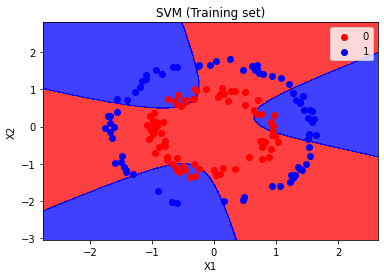

In [33]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

## Visualising the Test set results


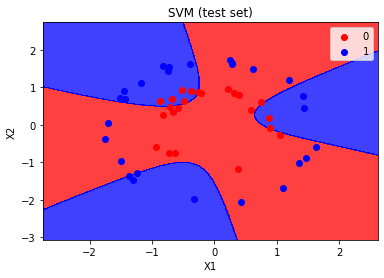

In [34]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SVM (test set)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()